In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARMA,ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from arch import arch_model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [26]:
def MAE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred)))

def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred))/(y_true))*100

In [11]:
df = pd.read_csv('Monthly_Pharmaceutical_Sales.csv')
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [12]:
df.tail()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
65,2019-06-30,151.54,101.627,103.20,610.00,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.80,649.80,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.20,518.10,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.50,984.48,227.8,16.0,161.0,109.10
69,2019-10-31,44.37,37.300,20.65,295.15,86.0,7.0,37.0,11.13


In [13]:
df.shape

(70, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


In [15]:
time = pd.date_range(start='1/31/2014',periods=70,freq='M')
df['time_stamp'] = pd.DataFrame(time)
df.drop('datum',axis=1,inplace=True)
df = df.set_index('time_stamp')

In [16]:
df.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
time_stamp,,,,,,,,
2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [17]:
df.tail()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
time_stamp,,,,,,,,
2019-06-30,151.54,101.627,103.20,610.00,193.0,25.0,142.0,156.04
2019-07-31,181.00,103.541,92.80,649.80,250.6,20.0,115.0,105.20
2019-08-31,181.91,88.269,84.20,518.10,237.0,26.0,145.0,97.30
2019-09-30,161.07,111.437,93.50,984.48,227.8,16.0,161.0,109.10
2019-10-31,44.37,37.300,20.65,295.15,86.0,7.0,37.0,11.13


In [18]:
df = df[['N02BE']]
df

,N02BE
time_stamp,
2014-01-31,878.030
2014-02-28,1001.900
2014-03-31,779.275
2014-04-30,698.500
2014-05-31,628.780
...,...
2019-06-30,610.000
2019-07-31,649.800
2019-08-31,518.100


In [19]:
df = df + 1

In [20]:
df

,N02BE
time_stamp,
2014-01-31,879.030
2014-02-28,1002.900
2014-03-31,780.275
2014-04-30,699.500
2014-05-31,629.780
...,...
2019-06-30,611.000
2019-07-31,650.800
2019-08-31,519.100


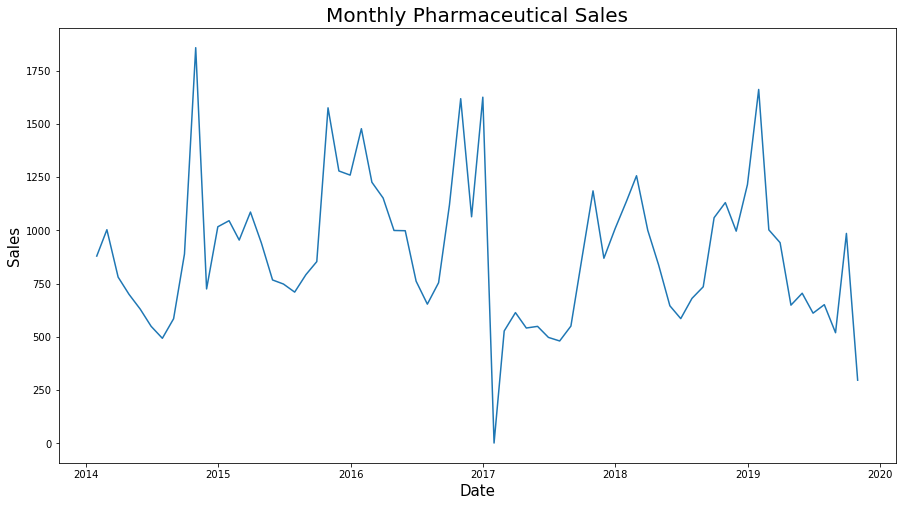

In [21]:
plt.plot(df)
plt.title('Monthly Pharmaceutical Sales',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.show()

In [22]:
plt.rcParams['figure.figsize'] = [15,8]

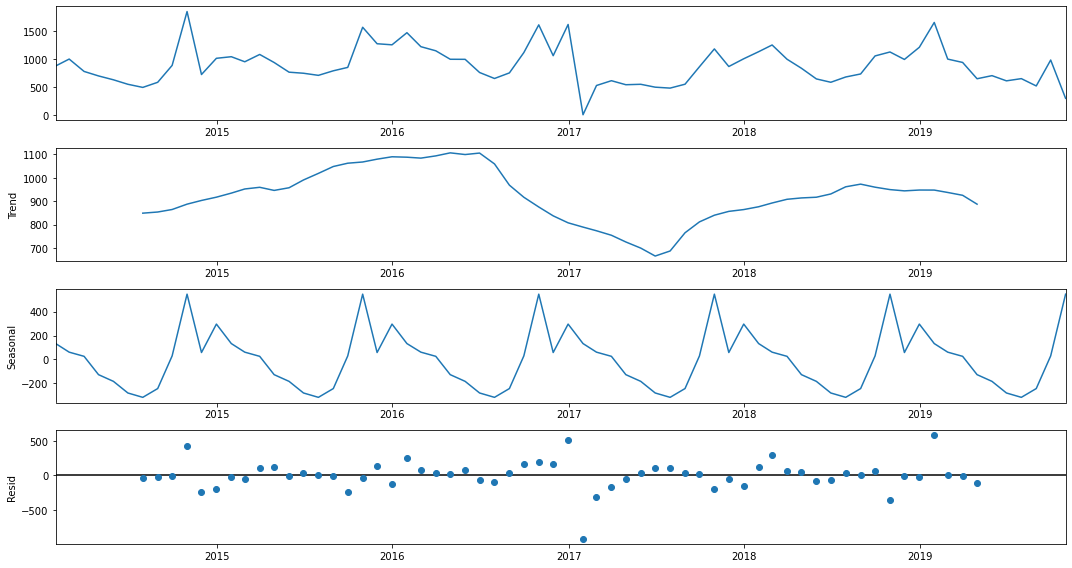

In [23]:
decomposition_model = seasonal_decompose(df,model='additive')
decomposition_model.plot();

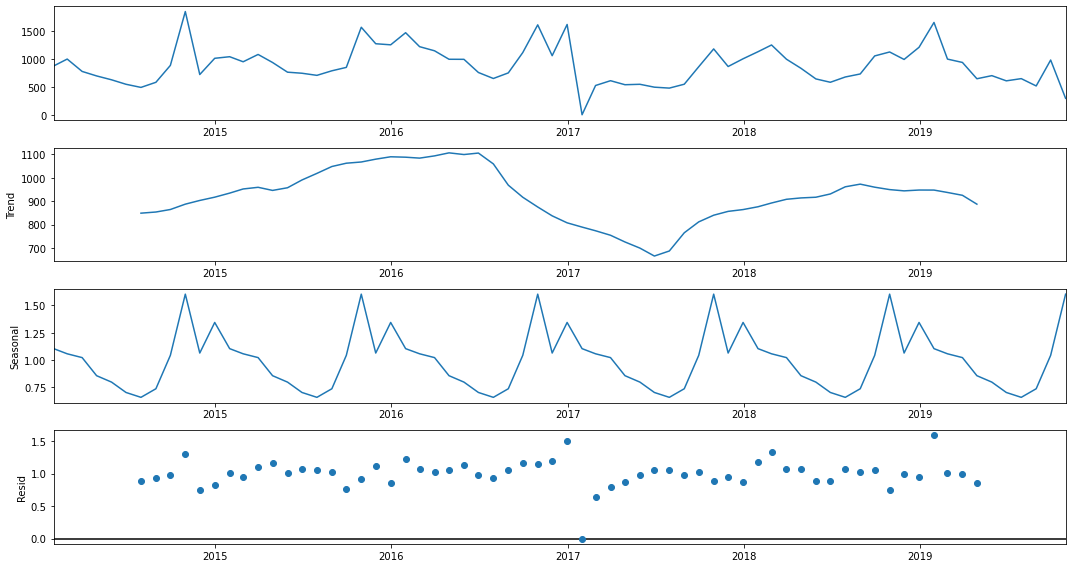

In [24]:
decomposition_model = seasonal_decompose(df,model='multiplicative')
decomposition_model.plot();

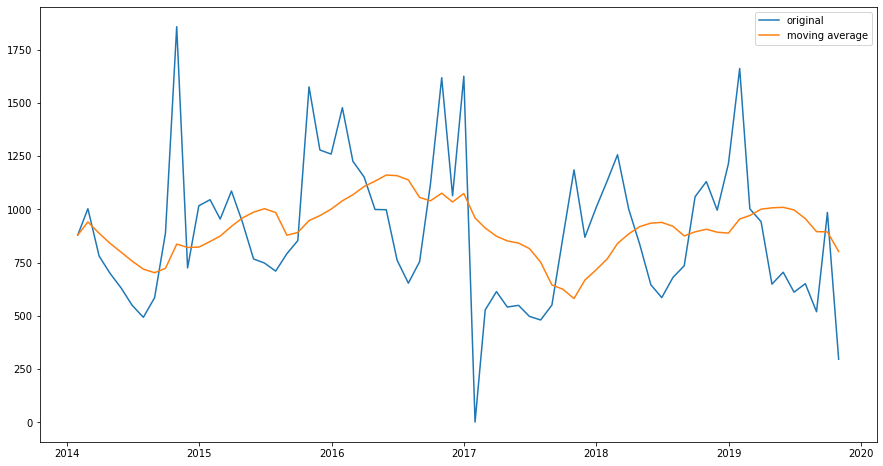

In [25]:
plt.plot(df,label='original')
plt.plot(df.rolling(10,min_periods=0).mean(),label='moving average')
plt.legend(loc='best')
plt.show()

In [17]:
# Model building - Exponential Smoothing Techniques

In [27]:
train_end = datetime(2018,10,31)
test_end = datetime(2020,1,31)

In [28]:
train = df[:train_end]
test = df[train_end + timedelta(days=1):test_end]

In [29]:
train

,N02BE
time_stamp,
2014-01-31,879.030
2014-02-28,1002.900
2014-03-31,780.275
2014-04-30,699.500
2014-05-31,629.780
2014-06-30,549.225
2014-07-31,492.900
2014-08-31,584.850
2014-09-30,888.820


In [30]:
test

,N02BE
time_stamp,
2018-11-30,996.150
2018-12-31,1214.950
2019-01-31,1661.612
2019-02-28,1002.212
2019-03-31,942.050
2019-04-30,648.650
2019-05-31,704.562
2019-06-30,611.000
2019-07-31,650.800


In [31]:
len(train)

58

In [32]:
len(test)

12

##### Simple Exponential Smoothing

In [47]:
SES = SimpleExpSmoothing(train,initialization_method='estimated')
SES_model = SES.fit(smoothing_level=0.1771855)
SES_model.summary()

Dep. Variable:,N02BE,No. Observations:,58
Model:,SimpleExpSmoothing,SSE,6632027.636
Optimized:,True,AIC,679.525
Trend:,None,BIC,683.646
Seasonal:,None,AICC,680.279
Seasonal Periods:,None,Date:,"Wed, 23 Mar 2022"
Box-Cox:,False,Time:,13:08:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1771855,alpha,False
initial_level,829.46370,l.0,True


In [48]:
SES_predict = SES_model.forecast(len(test))

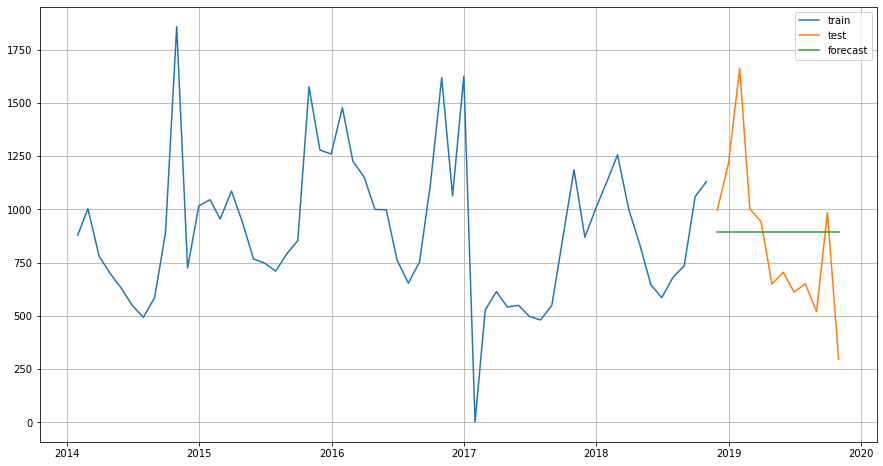

In [49]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [50]:
print("MAE:",MAE(test['N02BE'],SES_predict))
print("MAPE:",MAPE(test['N02BE'],SES_predict))

MAE: 281.01600000000013
MAPE: 44.07297227509836


##### Double Exponential Smoothing

In [124]:
DES = Holt(train,exponential=False,initialization_method='estimated')
DES_model = DES.fit(smoothing_level=0.10771855,
                   smoothing_trend=0.6000212062)
DES_model.summary()

Dep. Variable:,N02BE,No. Observations:,58
Model:,Holt,SSE,9788824.912
Optimized:,True,AIC,706.106
Trend:,Additive,BIC,714.348
Seasonal:,None,AICC,707.753
Seasonal Periods:,None,Date:,"Wed, 23 Mar 2022"
Box-Cox:,False,Time:,13:49:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1077185,alpha,False
smoothing_trend,0.6000212,beta,False


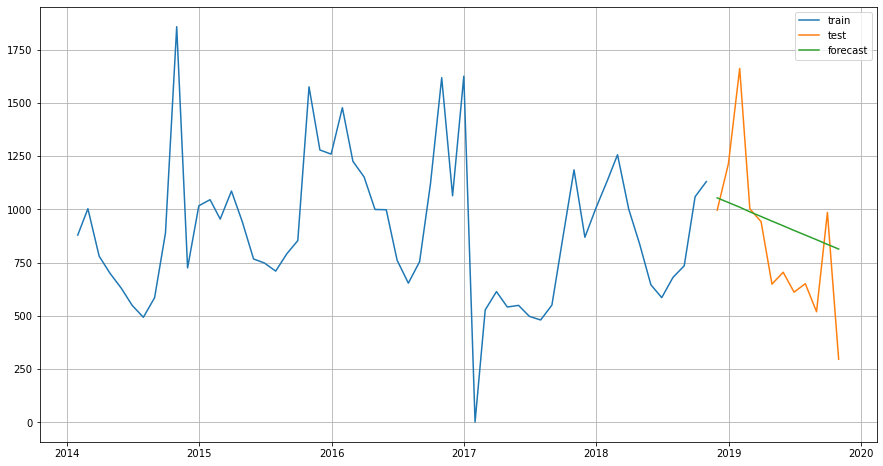

In [125]:
DES_predict = DES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [126]:
print("MAE:",MAE(test['N02BE'],DES_predict))
print("MAPE:",MAPE(test['N02BE'],DES_predict))

MAE: 247.35356987923151
MAPE: 39.849305250617356


##### Triple Exponential Smoothing

In [286]:
TES = ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',
                           initialization_method='estimated')
TES_model = TES.fit(smoothing_level=0.3285923,
                   smoothing_trend=0.1910949,
                   smoothing_seasonal=0.0001039)
TES_model.summary()

Dep. Variable:,N02BE,No. Observations:,58
Model:,ExponentialSmoothing,SSE,2944748.944
Optimized:,True,AIC,660.435
Trend:,Additive,BIC,693.402
Seasonal:,Multiplicative,AICC,677.974
Seasonal Periods:,12,Date:,"Wed, 23 Mar 2022"
Box-Cox:,False,Time:,14:55:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3285923,alpha,False
smoothing_trend,0.1910949,beta,False


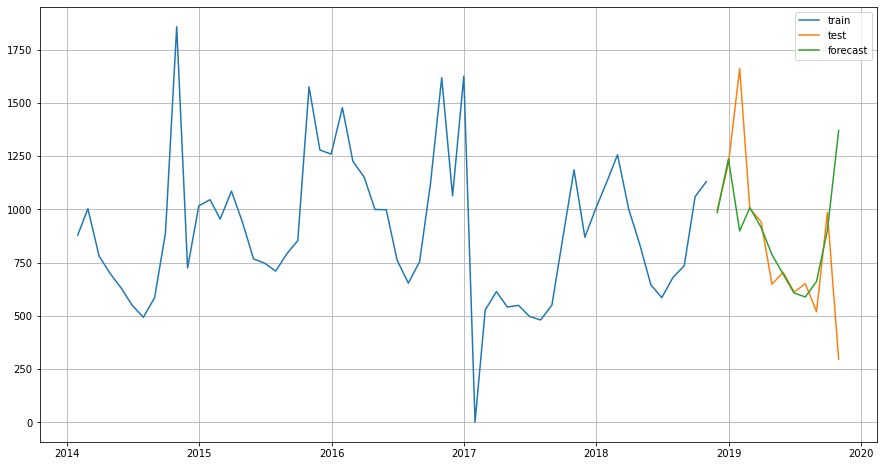

In [287]:
TES_predict = TES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [288]:
print("MAE:",MAE(test['N02BE'],TES_predict))
print("MAPE:",MAPE(test['N02BE'],TES_predict))

MAE: 195.28319662969633
MAPE: 40.313551711480386


##### ACF and PACF plots

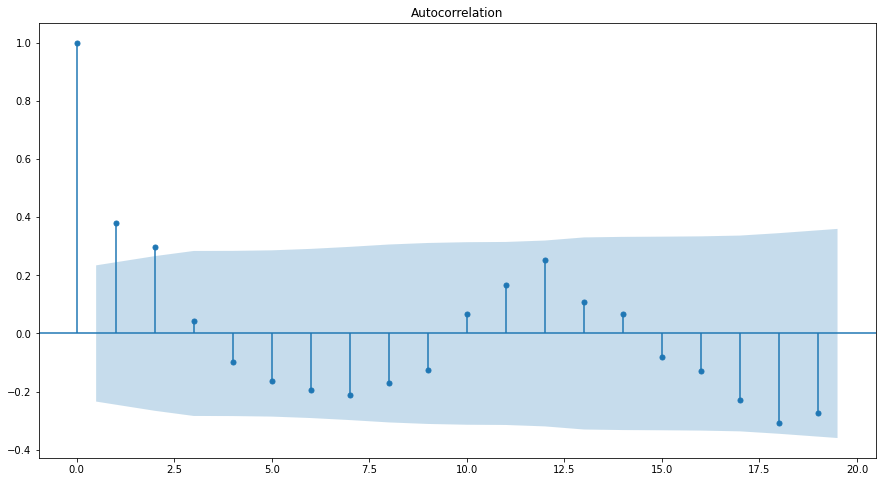

In [289]:
plot_acf(df)
plt.show()

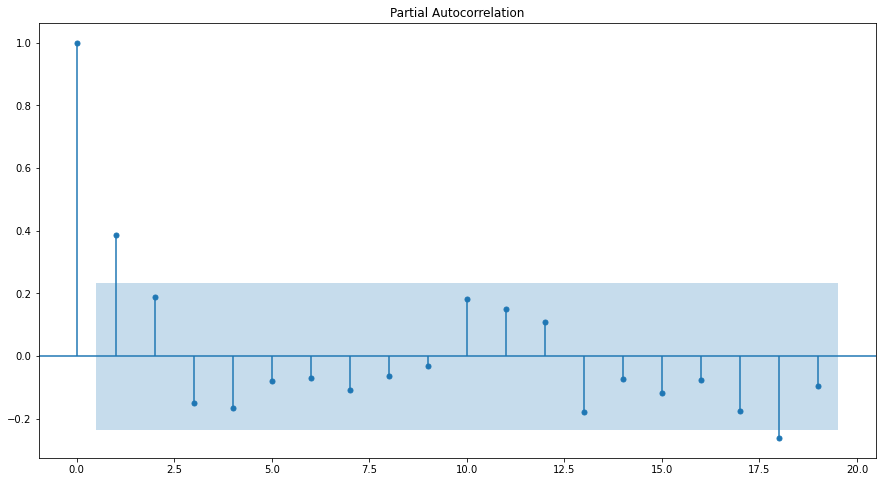

In [290]:
plot_pacf(df)
plt.show()

##### DickyFuller test

In [291]:
observations = df.values
df_results = adfuller(observations)
df_results

(-3.5930040112897625,
 0.005896193220440752,
 1,
 68,
 {'1%': -3.530398990560757,
  '5%': -2.9050874099328317,
  '10%': -2.5900010121107266},
 829.4790218597733)

In [292]:
##### Stationary series -- proceed with ARMA model

##### ARMA Model

In [309]:
model=ARMA(train,(7,8))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  N02BE   No. Observations:                   58
Model:                     ARMA(7, 8)   Log Likelihood                -406.884
Method:                       css-mle   S.D. of innovations            246.062
Date:                Wed, 23 Mar 2022   AIC                            847.769
Time:                        15:01:53   BIC                            882.796
Sample:                    01-31-2014   HQIC                           861.413
                         - 10-31-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         911.3513     44.834     20.327      0.000     823.478     999.224
ar.L1.N02BE    -0.4678        nan        nan        nan         nan         nan
ar.L2.N02BE     0.6926      0.088      7.904    

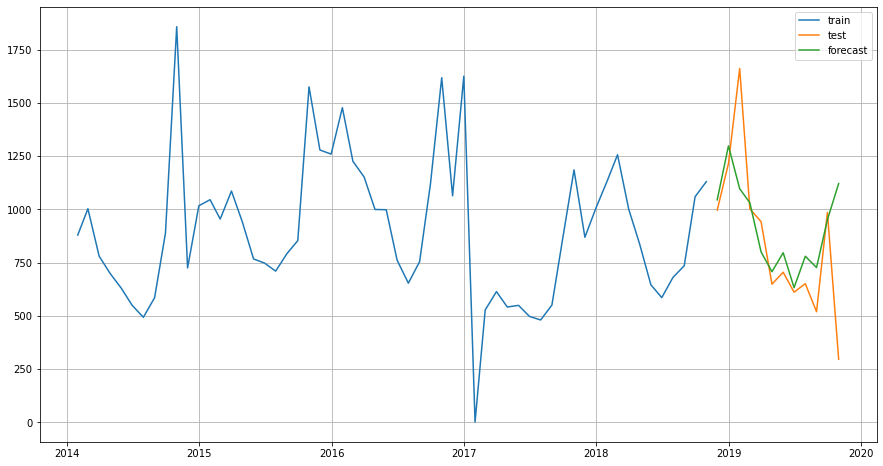

In [310]:
forecasted_values_arma = pd.Series(model_fit.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arma,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [311]:
print("MAE:",MAE(test['N02BE'],forecasted_values_arma))
print("MAPE:",MAPE(test['N02BE'],forecasted_values_arma))

MAE: 186.12989757083906
MAPE: 35.90500973835486


##### SARIMA Model

In [128]:
import itertools
p = q = range(0,9)
d = range(0,1)
pdq = list(itertools.product(p,d,q))
pdq_seasonal = [(x[0],x[1],x[2],18) for x in list(itertools.product(p,d,q))]

df_score = pd.DataFrame(columns=['param','seasonal','aic'])
df_score

,param,seasonal,aic


In [129]:
for param in pdq:
    for seasonal_param in pdq_seasonal:
        model = SARIMAX(train,
                       order = param,
                       seasonal_order = seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        sarimax_results = model.fit()
        print("SARIMAX",param,seasonal_param,'AIC:',sarimax_results.aic)
        df_score = df_score.append({'param':param,'seasonal':seasonal_param,'aic':sarimax_results.aic},ignore_index=True)

SARIMAX (0, 0, 0) (0, 0, 0, 18) AIC: 946.9616268877479
SARIMAX (0, 0, 0) (0, 0, 1, 18) AIC: 1352.368187293257
SARIMAX (0, 0, 0) (0, 0, 2, 18) AIC: 330.3273674580039
SARIMAX (0, 0, 0) (0, 0, 3, 18) AIC: 54.36225592244155
SARIMAX (0, 0, 0) (0, 0, 4, 18) AIC: 10.0
SARIMAX (0, 0, 0) (0, 0, 5, 18) AIC: 12.0
SARIMAX (0, 0, 0) (0, 0, 6, 18) AIC: 14.0
SARIMAX (0, 0, 0) (0, 0, 7, 18) AIC: 16.0
SARIMAX (0, 0, 0) (0, 0, 8, 18) AIC: 18.0
SARIMAX (0, 0, 0) (1, 0, 0, 18) AIC: 622.26777821068
SARIMAX (0, 0, 0) (1, 0, 1, 18) AIC: 593.541538184239
SARIMAX (0, 0, 0) (1, 0, 2, 18) AIC: 318.8314656970254
SARIMAX (0, 0, 0) (1, 0, 3, 18) AIC: 48.03738961543573
SARIMAX (0, 0, 0) (1, 0, 4, 18) AIC: 12.0
SARIMAX (0, 0, 0) (1, 0, 5, 18) AIC: 14.0
SARIMAX (0, 0, 0) (1, 0, 6, 18) AIC: 16.0
SARIMAX (0, 0, 0) (1, 0, 7, 18) AIC: 18.0
SARIMAX (0, 0, 0) (1, 0, 8, 18) AIC: 20.0
SARIMAX (0, 0, 0) (2, 0, 0, 18) AIC: 310.40213317506505
SARIMAX (0, 0, 0) (2, 0, 1, 18) AIC: 311.9555118086187
SARIMAX (0, 0, 0) (2, 0, 2, 18) 

SARIMAX (0, 0, 2) (2, 0, 2, 18) AIC: 258.5069008191581
SARIMAX (0, 0, 2) (2, 0, 3, 18) AIC: 10.329475259535005
SARIMAX (0, 0, 2) (2, 0, 4, 18) AIC: 18.0
SARIMAX (0, 0, 2) (2, 0, 5, 18) AIC: 20.0
SARIMAX (0, 0, 2) (2, 0, 6, 18) AIC: 22.0
SARIMAX (0, 0, 2) (2, 0, 7, 18) AIC: 24.0
SARIMAX (0, 0, 2) (2, 0, 8, 18) AIC: 26.0
SARIMAX (0, 0, 2) (3, 0, 0, 18) AIC: 55.94695575286458
SARIMAX (0, 0, 2) (3, 0, 1, 18) AIC: 57.9595501460015
SARIMAX (0, 0, 2) (3, 0, 2, 18) AIC: 60.137510979912555
SARIMAX (0, 0, 2) (3, 0, 3, 18) AIC: 11.453860102193358
SARIMAX (0, 0, 2) (3, 0, 4, 18) AIC: 20.0
SARIMAX (0, 0, 2) (3, 0, 5, 18) AIC: 22.0
SARIMAX (0, 0, 2) (3, 0, 6, 18) AIC: 24.0
SARIMAX (0, 0, 2) (3, 0, 7, 18) AIC: 26.0
SARIMAX (0, 0, 2) (3, 0, 8, 18) AIC: 28.0
SARIMAX (0, 0, 2) (4, 0, 0, 18) AIC: 14.0
SARIMAX (0, 0, 2) (4, 0, 1, 18) AIC: 16.0
SARIMAX (0, 0, 2) (4, 0, 2, 18) AIC: 18.0
SARIMAX (0, 0, 2) (4, 0, 3, 18) AIC: 20.0
SARIMAX (0, 0, 2) (4, 0, 4, 18) AIC: 22.0
SARIMAX (0, 0, 2) (4, 0, 5, 18) AIC: 2

SARIMAX (0, 0, 4) (4, 0, 8, 18) AIC: 34.0
SARIMAX (0, 0, 4) (5, 0, 0, 18) AIC: 20.0
SARIMAX (0, 0, 4) (5, 0, 1, 18) AIC: 22.0
SARIMAX (0, 0, 4) (5, 0, 2, 18) AIC: 24.0
SARIMAX (0, 0, 4) (5, 0, 3, 18) AIC: 26.0
SARIMAX (0, 0, 4) (5, 0, 4, 18) AIC: 28.0
SARIMAX (0, 0, 4) (5, 0, 5, 18) AIC: 30.0
SARIMAX (0, 0, 4) (5, 0, 6, 18) AIC: 32.0
SARIMAX (0, 0, 4) (5, 0, 7, 18) AIC: 34.0
SARIMAX (0, 0, 4) (5, 0, 8, 18) AIC: 36.0
SARIMAX (0, 0, 4) (6, 0, 0, 18) AIC: 22.0
SARIMAX (0, 0, 4) (6, 0, 1, 18) AIC: 24.0
SARIMAX (0, 0, 4) (6, 0, 2, 18) AIC: 26.0
SARIMAX (0, 0, 4) (6, 0, 3, 18) AIC: 28.0
SARIMAX (0, 0, 4) (6, 0, 4, 18) AIC: 30.0
SARIMAX (0, 0, 4) (6, 0, 5, 18) AIC: 32.0
SARIMAX (0, 0, 4) (6, 0, 6, 18) AIC: 34.0
SARIMAX (0, 0, 4) (6, 0, 7, 18) AIC: 36.0
SARIMAX (0, 0, 4) (6, 0, 8, 18) AIC: 38.0
SARIMAX (0, 0, 4) (7, 0, 0, 18) AIC: 24.0
SARIMAX (0, 0, 4) (7, 0, 1, 18) AIC: 26.0
SARIMAX (0, 0, 4) (7, 0, 2, 18) AIC: 28.0
SARIMAX (0, 0, 4) (7, 0, 3, 18) AIC: 30.0
SARIMAX (0, 0, 4) (7, 0, 4, 18) AI

SARIMAX (0, 0, 6) (7, 0, 7, 18) AIC: 42.0
SARIMAX (0, 0, 6) (7, 0, 8, 18) AIC: 44.0
SARIMAX (0, 0, 6) (8, 0, 0, 18) AIC: 30.0
SARIMAX (0, 0, 6) (8, 0, 1, 18) AIC: 32.0
SARIMAX (0, 0, 6) (8, 0, 2, 18) AIC: 34.0
SARIMAX (0, 0, 6) (8, 0, 3, 18) AIC: 36.0
SARIMAX (0, 0, 6) (8, 0, 4, 18) AIC: 38.0
SARIMAX (0, 0, 6) (8, 0, 5, 18) AIC: 40.0
SARIMAX (0, 0, 6) (8, 0, 6, 18) AIC: 42.0
SARIMAX (0, 0, 6) (8, 0, 7, 18) AIC: 44.0
SARIMAX (0, 0, 6) (8, 0, 8, 18) AIC: 46.0
SARIMAX (0, 0, 7) (0, 0, 0, 18) AIC: 754.7303967212989
SARIMAX (0, 0, 7) (0, 0, 1, 18) AIC: 2373.59543397308
SARIMAX (0, 0, 7) (0, 0, 2, 18) AIC: 205.83567925079294
SARIMAX (0, 0, 7) (0, 0, 3, 18) AIC: 22.0
SARIMAX (0, 0, 7) (0, 0, 4, 18) AIC: 24.0
SARIMAX (0, 0, 7) (0, 0, 5, 18) AIC: 26.0
SARIMAX (0, 0, 7) (0, 0, 6, 18) AIC: 28.0
SARIMAX (0, 0, 7) (0, 0, 7, 18) AIC: 30.0
SARIMAX (0, 0, 7) (0, 0, 8, 18) AIC: 32.0
SARIMAX (0, 0, 7) (1, 0, 0, 18) AIC: 603.3840372949796
SARIMAX (0, 0, 7) (1, 0, 1, 18) AIC: 486.7030880529473
SARIMAX (0,

SARIMAX (1, 0, 0) (1, 0, 5, 18) AIC: 16.0
SARIMAX (1, 0, 0) (1, 0, 6, 18) AIC: 18.0
SARIMAX (1, 0, 0) (1, 0, 7, 18) AIC: 20.0
SARIMAX (1, 0, 0) (1, 0, 8, 18) AIC: 22.0
SARIMAX (1, 0, 0) (2, 0, 0, 18) AIC: 282.78814269332213
SARIMAX (1, 0, 0) (2, 0, 1, 18) AIC: 283.8512863679823
SARIMAX (1, 0, 0) (2, 0, 2, 18) AIC: 285.8507915365159
SARIMAX (1, 0, 0) (2, 0, 3, 18) AIC: 22.650133900539565
SARIMAX (1, 0, 0) (2, 0, 4, 18) AIC: 16.0
SARIMAX (1, 0, 0) (2, 0, 5, 18) AIC: 18.0
SARIMAX (1, 0, 0) (2, 0, 6, 18) AIC: 20.0
SARIMAX (1, 0, 0) (2, 0, 7, 18) AIC: 22.0
SARIMAX (1, 0, 0) (2, 0, 8, 18) AIC: 24.0
SARIMAX (1, 0, 0) (3, 0, 0, 18) AIC: 41.44519030790199
SARIMAX (1, 0, 0) (3, 0, 1, 18) AIC: 40.158824386133986
SARIMAX (1, 0, 0) (3, 0, 2, 18) AIC: 33.62640978105392
SARIMAX (1, 0, 0) (3, 0, 3, 18) AIC: 52.20122870598999
SARIMAX (1, 0, 0) (3, 0, 4, 18) AIC: 18.0
SARIMAX (1, 0, 0) (3, 0, 5, 18) AIC: 20.0
SARIMAX (1, 0, 0) (3, 0, 6, 18) AIC: 22.0
SARIMAX (1, 0, 0) (3, 0, 7, 18) AIC: 24.0
SARIMAX (1,

SARIMAX (1, 0, 2) (3, 0, 8, 18) AIC: 30.0
SARIMAX (1, 0, 2) (4, 0, 0, 18) AIC: 16.0
SARIMAX (1, 0, 2) (4, 0, 1, 18) AIC: 18.0
SARIMAX (1, 0, 2) (4, 0, 2, 18) AIC: 20.0
SARIMAX (1, 0, 2) (4, 0, 3, 18) AIC: 22.0
SARIMAX (1, 0, 2) (4, 0, 4, 18) AIC: 24.0
SARIMAX (1, 0, 2) (4, 0, 5, 18) AIC: 26.0
SARIMAX (1, 0, 2) (4, 0, 6, 18) AIC: 28.0
SARIMAX (1, 0, 2) (4, 0, 7, 18) AIC: 30.0
SARIMAX (1, 0, 2) (4, 0, 8, 18) AIC: 32.0
SARIMAX (1, 0, 2) (5, 0, 0, 18) AIC: 18.0
SARIMAX (1, 0, 2) (5, 0, 1, 18) AIC: 20.0
SARIMAX (1, 0, 2) (5, 0, 2, 18) AIC: 22.0
SARIMAX (1, 0, 2) (5, 0, 3, 18) AIC: 24.0
SARIMAX (1, 0, 2) (5, 0, 4, 18) AIC: 26.0
SARIMAX (1, 0, 2) (5, 0, 5, 18) AIC: 28.0
SARIMAX (1, 0, 2) (5, 0, 6, 18) AIC: 30.0
SARIMAX (1, 0, 2) (5, 0, 7, 18) AIC: 32.0
SARIMAX (1, 0, 2) (5, 0, 8, 18) AIC: 34.0
SARIMAX (1, 0, 2) (6, 0, 0, 18) AIC: 20.0
SARIMAX (1, 0, 2) (6, 0, 1, 18) AIC: 22.0
SARIMAX (1, 0, 2) (6, 0, 2, 18) AIC: 24.0
SARIMAX (1, 0, 2) (6, 0, 3, 18) AIC: 26.0
SARIMAX (1, 0, 2) (6, 0, 4, 18) AI

SARIMAX (1, 0, 4) (6, 0, 7, 18) AIC: 38.0
SARIMAX (1, 0, 4) (6, 0, 8, 18) AIC: 40.0
SARIMAX (1, 0, 4) (7, 0, 0, 18) AIC: 26.0
SARIMAX (1, 0, 4) (7, 0, 1, 18) AIC: 28.0
SARIMAX (1, 0, 4) (7, 0, 2, 18) AIC: 30.0
SARIMAX (1, 0, 4) (7, 0, 3, 18) AIC: 32.0
SARIMAX (1, 0, 4) (7, 0, 4, 18) AIC: 34.0
SARIMAX (1, 0, 4) (7, 0, 5, 18) AIC: 36.0
SARIMAX (1, 0, 4) (7, 0, 6, 18) AIC: 38.0
SARIMAX (1, 0, 4) (7, 0, 7, 18) AIC: 40.0
SARIMAX (1, 0, 4) (7, 0, 8, 18) AIC: 42.0
SARIMAX (1, 0, 4) (8, 0, 0, 18) AIC: 28.0
SARIMAX (1, 0, 4) (8, 0, 1, 18) AIC: 30.0
SARIMAX (1, 0, 4) (8, 0, 2, 18) AIC: 32.0
SARIMAX (1, 0, 4) (8, 0, 3, 18) AIC: 34.0
SARIMAX (1, 0, 4) (8, 0, 4, 18) AIC: 36.0
SARIMAX (1, 0, 4) (8, 0, 5, 18) AIC: 38.0
SARIMAX (1, 0, 4) (8, 0, 6, 18) AIC: 40.0
SARIMAX (1, 0, 4) (8, 0, 7, 18) AIC: 42.0
SARIMAX (1, 0, 4) (8, 0, 8, 18) AIC: 44.0
SARIMAX (1, 0, 5) (0, 0, 0, 18) AIC: 762.0908872388944
SARIMAX (1, 0, 5) (0, 0, 1, 18) AIC: 1863.3763759375875
SARIMAX (1, 0, 5) (0, 0, 2, 18) AIC: 226.88291766

SARIMAX (1, 0, 7) (0, 0, 5, 18) AIC: 28.0
SARIMAX (1, 0, 7) (0, 0, 6, 18) AIC: 30.0
SARIMAX (1, 0, 7) (0, 0, 7, 18) AIC: 32.0
SARIMAX (1, 0, 7) (0, 0, 8, 18) AIC: 34.0
SARIMAX (1, 0, 7) (1, 0, 0, 18) AIC: 574.41824867966
SARIMAX (1, 0, 7) (1, 0, 1, 18) AIC: 476.82856956789004
SARIMAX (1, 0, 7) (1, 0, 2, 18) AIC: 206.89698700763108
SARIMAX (1, 0, 7) (1, 0, 3, 18) AIC: 26.0
SARIMAX (1, 0, 7) (1, 0, 4, 18) AIC: 28.0
SARIMAX (1, 0, 7) (1, 0, 5, 18) AIC: 30.0
SARIMAX (1, 0, 7) (1, 0, 6, 18) AIC: 32.0
SARIMAX (1, 0, 7) (1, 0, 7, 18) AIC: 34.0
SARIMAX (1, 0, 7) (1, 0, 8, 18) AIC: 36.0
SARIMAX (1, 0, 7) (2, 0, 0, 18) AIC: 286.7562500297108
SARIMAX (1, 0, 7) (2, 0, 1, 18) AIC: 299.12125581918343
SARIMAX (1, 0, 7) (2, 0, 2, 18) AIC: 201.111262024697
SARIMAX (1, 0, 7) (2, 0, 3, 18) AIC: 28.0
SARIMAX (1, 0, 7) (2, 0, 4, 18) AIC: 30.0
SARIMAX (1, 0, 7) (2, 0, 5, 18) AIC: 32.0
SARIMAX (1, 0, 7) (2, 0, 6, 18) AIC: 34.0
SARIMAX (1, 0, 7) (2, 0, 7, 18) AIC: 36.0
SARIMAX (1, 0, 7) (2, 0, 8, 18) AIC: 38.

SARIMAX (2, 0, 0) (3, 0, 1, 18) AIC: 14.957031704919679
SARIMAX (2, 0, 0) (3, 0, 2, 18) AIC: 10.981583600836144
SARIMAX (2, 0, 0) (3, 0, 3, 18) AIC: 13.662446510118539
SARIMAX (2, 0, 0) (3, 0, 4, 18) AIC: 20.0
SARIMAX (2, 0, 0) (3, 0, 5, 18) AIC: 22.0
SARIMAX (2, 0, 0) (3, 0, 6, 18) AIC: 24.0
SARIMAX (2, 0, 0) (3, 0, 7, 18) AIC: 26.0
SARIMAX (2, 0, 0) (3, 0, 8, 18) AIC: 28.0
SARIMAX (2, 0, 0) (4, 0, 0, 18) AIC: 14.0
SARIMAX (2, 0, 0) (4, 0, 1, 18) AIC: 16.0
SARIMAX (2, 0, 0) (4, 0, 2, 18) AIC: 18.0
SARIMAX (2, 0, 0) (4, 0, 3, 18) AIC: 20.0
SARIMAX (2, 0, 0) (4, 0, 4, 18) AIC: 22.0
SARIMAX (2, 0, 0) (4, 0, 5, 18) AIC: 24.0
SARIMAX (2, 0, 0) (4, 0, 6, 18) AIC: 26.0
SARIMAX (2, 0, 0) (4, 0, 7, 18) AIC: 28.0
SARIMAX (2, 0, 0) (4, 0, 8, 18) AIC: 30.0
SARIMAX (2, 0, 0) (5, 0, 0, 18) AIC: 16.0
SARIMAX (2, 0, 0) (5, 0, 1, 18) AIC: 18.0
SARIMAX (2, 0, 0) (5, 0, 2, 18) AIC: 20.0
SARIMAX (2, 0, 0) (5, 0, 3, 18) AIC: 22.0
SARIMAX (2, 0, 0) (5, 0, 4, 18) AIC: 24.0
SARIMAX (2, 0, 0) (5, 0, 5, 18) AI

SARIMAX (2, 0, 2) (5, 0, 5, 18) AIC: 30.0
SARIMAX (2, 0, 2) (5, 0, 6, 18) AIC: 32.0
SARIMAX (2, 0, 2) (5, 0, 7, 18) AIC: 34.0
SARIMAX (2, 0, 2) (5, 0, 8, 18) AIC: 36.0
SARIMAX (2, 0, 2) (6, 0, 0, 18) AIC: 22.0
SARIMAX (2, 0, 2) (6, 0, 1, 18) AIC: 24.0
SARIMAX (2, 0, 2) (6, 0, 2, 18) AIC: 26.0
SARIMAX (2, 0, 2) (6, 0, 3, 18) AIC: 28.0
SARIMAX (2, 0, 2) (6, 0, 4, 18) AIC: 30.0
SARIMAX (2, 0, 2) (6, 0, 5, 18) AIC: 32.0
SARIMAX (2, 0, 2) (6, 0, 6, 18) AIC: 34.0
SARIMAX (2, 0, 2) (6, 0, 7, 18) AIC: 36.0
SARIMAX (2, 0, 2) (6, 0, 8, 18) AIC: 38.0
SARIMAX (2, 0, 2) (7, 0, 0, 18) AIC: 24.0
SARIMAX (2, 0, 2) (7, 0, 1, 18) AIC: 26.0
SARIMAX (2, 0, 2) (7, 0, 2, 18) AIC: 28.0
SARIMAX (2, 0, 2) (7, 0, 3, 18) AIC: 30.0
SARIMAX (2, 0, 2) (7, 0, 4, 18) AIC: 32.0
SARIMAX (2, 0, 2) (7, 0, 5, 18) AIC: 34.0
SARIMAX (2, 0, 2) (7, 0, 6, 18) AIC: 36.0
SARIMAX (2, 0, 2) (7, 0, 7, 18) AIC: 38.0
SARIMAX (2, 0, 2) (7, 0, 8, 18) AIC: 40.0
SARIMAX (2, 0, 2) (8, 0, 0, 18) AIC: 26.0
SARIMAX (2, 0, 2) (8, 0, 1, 18) AI

SARIMAX (2, 0, 4) (8, 0, 4, 18) AIC: 38.0
SARIMAX (2, 0, 4) (8, 0, 5, 18) AIC: 40.0
SARIMAX (2, 0, 4) (8, 0, 6, 18) AIC: 42.0
SARIMAX (2, 0, 4) (8, 0, 7, 18) AIC: 44.0
SARIMAX (2, 0, 4) (8, 0, 8, 18) AIC: 46.0
SARIMAX (2, 0, 5) (0, 0, 0, 18) AIC: 763.9833211172092
SARIMAX (2, 0, 5) (0, 0, 1, 18) AIC: 2820.5975496195692
SARIMAX (2, 0, 5) (0, 0, 2, 18) AIC: 232.44630790402374
SARIMAX (2, 0, 5) (0, 0, 3, 18) AIC: 22.0
SARIMAX (2, 0, 5) (0, 0, 4, 18) AIC: 24.0
SARIMAX (2, 0, 5) (0, 0, 5, 18) AIC: 26.0
SARIMAX (2, 0, 5) (0, 0, 6, 18) AIC: 28.0
SARIMAX (2, 0, 5) (0, 0, 7, 18) AIC: 30.0
SARIMAX (2, 0, 5) (0, 0, 8, 18) AIC: 32.0
SARIMAX (2, 0, 5) (1, 0, 0, 18) AIC: 560.6242540762414
SARIMAX (2, 0, 5) (1, 0, 1, 18) AIC: 503.51284787513595
SARIMAX (2, 0, 5) (1, 0, 2, 18) AIC: 237.4658013700845
SARIMAX (2, 0, 5) (1, 0, 3, 18) AIC: 24.0
SARIMAX (2, 0, 5) (1, 0, 4, 18) AIC: 26.0
SARIMAX (2, 0, 5) (1, 0, 5, 18) AIC: 28.0
SARIMAX (2, 0, 5) (1, 0, 6, 18) AIC: 30.0
SARIMAX (2, 0, 5) (1, 0, 7, 18) AIC: 

SARIMAX (2, 0, 7) (2, 0, 1, 18) AIC: 291.2591058900469
SARIMAX (2, 0, 7) (2, 0, 2, 18) AIC: 216.9981103363507
SARIMAX (2, 0, 7) (2, 0, 3, 18) AIC: 30.0
SARIMAX (2, 0, 7) (2, 0, 4, 18) AIC: 32.0
SARIMAX (2, 0, 7) (2, 0, 5, 18) AIC: 34.0
SARIMAX (2, 0, 7) (2, 0, 6, 18) AIC: 36.0
SARIMAX (2, 0, 7) (2, 0, 7, 18) AIC: 38.0
SARIMAX (2, 0, 7) (2, 0, 8, 18) AIC: 40.0
SARIMAX (2, 0, 7) (3, 0, 0, 18) AIC: 26.314098798704876
SARIMAX (2, 0, 7) (3, 0, 1, 18) AIC: 36.01777644915384
SARIMAX (2, 0, 7) (3, 0, 2, 18) AIC: 23.32069126400762
SARIMAX (2, 0, 7) (3, 0, 3, 18) AIC: 32.0
SARIMAX (2, 0, 7) (3, 0, 4, 18) AIC: 34.0
SARIMAX (2, 0, 7) (3, 0, 5, 18) AIC: 36.0
SARIMAX (2, 0, 7) (3, 0, 6, 18) AIC: 38.0
SARIMAX (2, 0, 7) (3, 0, 7, 18) AIC: 40.0
SARIMAX (2, 0, 7) (3, 0, 8, 18) AIC: 42.0
SARIMAX (2, 0, 7) (4, 0, 0, 18) AIC: 28.0
SARIMAX (2, 0, 7) (4, 0, 1, 18) AIC: 30.0
SARIMAX (2, 0, 7) (4, 0, 2, 18) AIC: 32.0
SARIMAX (2, 0, 7) (4, 0, 3, 18) AIC: 34.0
SARIMAX (2, 0, 7) (4, 0, 4, 18) AIC: 36.0
SARIMAX (2

SARIMAX (3, 0, 0) (4, 0, 6, 18) AIC: 28.0
SARIMAX (3, 0, 0) (4, 0, 7, 18) AIC: 30.0
SARIMAX (3, 0, 0) (4, 0, 8, 18) AIC: 32.0
SARIMAX (3, 0, 0) (5, 0, 0, 18) AIC: 18.0
SARIMAX (3, 0, 0) (5, 0, 1, 18) AIC: 20.0
SARIMAX (3, 0, 0) (5, 0, 2, 18) AIC: 22.0
SARIMAX (3, 0, 0) (5, 0, 3, 18) AIC: 24.0
SARIMAX (3, 0, 0) (5, 0, 4, 18) AIC: 26.0
SARIMAX (3, 0, 0) (5, 0, 5, 18) AIC: 28.0
SARIMAX (3, 0, 0) (5, 0, 6, 18) AIC: 30.0
SARIMAX (3, 0, 0) (5, 0, 7, 18) AIC: 32.0
SARIMAX (3, 0, 0) (5, 0, 8, 18) AIC: 34.0
SARIMAX (3, 0, 0) (6, 0, 0, 18) AIC: 20.0
SARIMAX (3, 0, 0) (6, 0, 1, 18) AIC: 22.0
SARIMAX (3, 0, 0) (6, 0, 2, 18) AIC: 24.0
SARIMAX (3, 0, 0) (6, 0, 3, 18) AIC: 26.0
SARIMAX (3, 0, 0) (6, 0, 4, 18) AIC: 28.0
SARIMAX (3, 0, 0) (6, 0, 5, 18) AIC: 30.0
SARIMAX (3, 0, 0) (6, 0, 6, 18) AIC: 32.0
SARIMAX (3, 0, 0) (6, 0, 7, 18) AIC: 34.0
SARIMAX (3, 0, 0) (6, 0, 8, 18) AIC: 36.0
SARIMAX (3, 0, 0) (7, 0, 0, 18) AIC: 22.0
SARIMAX (3, 0, 0) (7, 0, 1, 18) AIC: 24.0
SARIMAX (3, 0, 0) (7, 0, 2, 18) AI

SARIMAX (3, 0, 2) (7, 0, 2, 18) AIC: 30.0
SARIMAX (3, 0, 2) (7, 0, 3, 18) AIC: 32.0
SARIMAX (3, 0, 2) (7, 0, 4, 18) AIC: 34.0
SARIMAX (3, 0, 2) (7, 0, 5, 18) AIC: 36.0
SARIMAX (3, 0, 2) (7, 0, 6, 18) AIC: 38.0
SARIMAX (3, 0, 2) (7, 0, 7, 18) AIC: 40.0
SARIMAX (3, 0, 2) (7, 0, 8, 18) AIC: 42.0
SARIMAX (3, 0, 2) (8, 0, 0, 18) AIC: 28.0
SARIMAX (3, 0, 2) (8, 0, 1, 18) AIC: 30.0
SARIMAX (3, 0, 2) (8, 0, 2, 18) AIC: 32.0
SARIMAX (3, 0, 2) (8, 0, 3, 18) AIC: 34.0
SARIMAX (3, 0, 2) (8, 0, 4, 18) AIC: 36.0
SARIMAX (3, 0, 2) (8, 0, 5, 18) AIC: 38.0
SARIMAX (3, 0, 2) (8, 0, 6, 18) AIC: 40.0
SARIMAX (3, 0, 2) (8, 0, 7, 18) AIC: 42.0
SARIMAX (3, 0, 2) (8, 0, 8, 18) AIC: 44.0
SARIMAX (3, 0, 3) (0, 0, 0, 18) AIC: 789.4745648154595
SARIMAX (3, 0, 3) (0, 0, 1, 18) AIC: 2733.5694763008423
SARIMAX (3, 0, 3) (0, 0, 2, 18) AIC: 262.80405921100277
SARIMAX (3, 0, 3) (0, 0, 3, 18) AIC: 20.0
SARIMAX (3, 0, 3) (0, 0, 4, 18) AIC: 22.0
SARIMAX (3, 0, 3) (0, 0, 5, 18) AIC: 24.0
SARIMAX (3, 0, 3) (0, 0, 6, 18) AIC

SARIMAX (3, 0, 5) (1, 0, 0, 18) AIC: 549.3007212205997
SARIMAX (3, 0, 5) (1, 0, 1, 18) AIC: 504.81078146814576
SARIMAX (3, 0, 5) (1, 0, 2, 18) AIC: 242.3138977863506
SARIMAX (3, 0, 5) (1, 0, 3, 18) AIC: 26.0
SARIMAX (3, 0, 5) (1, 0, 4, 18) AIC: 28.0
SARIMAX (3, 0, 5) (1, 0, 5, 18) AIC: 30.0
SARIMAX (3, 0, 5) (1, 0, 6, 18) AIC: 32.0
SARIMAX (3, 0, 5) (1, 0, 7, 18) AIC: 34.0
SARIMAX (3, 0, 5) (1, 0, 8, 18) AIC: 36.0
SARIMAX (3, 0, 5) (2, 0, 0, 18) AIC: 277.96783990189954
SARIMAX (3, 0, 5) (2, 0, 1, 18) AIC: 280.0537611075918
SARIMAX (3, 0, 5) (2, 0, 2, 18) AIC: 240.33827121133265
SARIMAX (3, 0, 5) (2, 0, 3, 18) AIC: 28.0
SARIMAX (3, 0, 5) (2, 0, 4, 18) AIC: 30.0
SARIMAX (3, 0, 5) (2, 0, 5, 18) AIC: 32.0
SARIMAX (3, 0, 5) (2, 0, 6, 18) AIC: 34.0
SARIMAX (3, 0, 5) (2, 0, 7, 18) AIC: 36.0
SARIMAX (3, 0, 5) (2, 0, 8, 18) AIC: 38.0
SARIMAX (3, 0, 5) (3, 0, 0, 18) AIC: 22.984551245460118
SARIMAX (3, 0, 5) (3, 0, 1, 18) AIC: 26.787270062905232
SARIMAX (3, 0, 5) (3, 0, 2, 18) AIC: 30.94127854866

SARIMAX (3, 0, 7) (3, 0, 5, 18) AIC: 38.0
SARIMAX (3, 0, 7) (3, 0, 6, 18) AIC: 40.0
SARIMAX (3, 0, 7) (3, 0, 7, 18) AIC: 42.0
SARIMAX (3, 0, 7) (3, 0, 8, 18) AIC: 44.0
SARIMAX (3, 0, 7) (4, 0, 0, 18) AIC: 30.0
SARIMAX (3, 0, 7) (4, 0, 1, 18) AIC: 32.0
SARIMAX (3, 0, 7) (4, 0, 2, 18) AIC: 34.0
SARIMAX (3, 0, 7) (4, 0, 3, 18) AIC: 36.0
SARIMAX (3, 0, 7) (4, 0, 4, 18) AIC: 38.0
SARIMAX (3, 0, 7) (4, 0, 5, 18) AIC: 40.0
SARIMAX (3, 0, 7) (4, 0, 6, 18) AIC: 42.0
SARIMAX (3, 0, 7) (4, 0, 7, 18) AIC: 44.0
SARIMAX (3, 0, 7) (4, 0, 8, 18) AIC: 46.0
SARIMAX (3, 0, 7) (5, 0, 0, 18) AIC: 32.0
SARIMAX (3, 0, 7) (5, 0, 1, 18) AIC: 34.0
SARIMAX (3, 0, 7) (5, 0, 2, 18) AIC: 36.0
SARIMAX (3, 0, 7) (5, 0, 3, 18) AIC: 38.0
SARIMAX (3, 0, 7) (5, 0, 4, 18) AIC: 40.0
SARIMAX (3, 0, 7) (5, 0, 5, 18) AIC: 42.0
SARIMAX (3, 0, 7) (5, 0, 6, 18) AIC: 44.0
SARIMAX (3, 0, 7) (5, 0, 7, 18) AIC: 46.0
SARIMAX (3, 0, 7) (5, 0, 8, 18) AIC: 48.0
SARIMAX (3, 0, 7) (6, 0, 0, 18) AIC: 34.0
SARIMAX (3, 0, 7) (6, 0, 1, 18) AI

SARIMAX (4, 0, 0) (6, 0, 4, 18) AIC: 30.0
SARIMAX (4, 0, 0) (6, 0, 5, 18) AIC: 32.0
SARIMAX (4, 0, 0) (6, 0, 6, 18) AIC: 34.0
SARIMAX (4, 0, 0) (6, 0, 7, 18) AIC: 36.0
SARIMAX (4, 0, 0) (6, 0, 8, 18) AIC: 38.0
SARIMAX (4, 0, 0) (7, 0, 0, 18) AIC: 24.0
SARIMAX (4, 0, 0) (7, 0, 1, 18) AIC: 26.0
SARIMAX (4, 0, 0) (7, 0, 2, 18) AIC: 28.0
SARIMAX (4, 0, 0) (7, 0, 3, 18) AIC: 30.0
SARIMAX (4, 0, 0) (7, 0, 4, 18) AIC: 32.0
SARIMAX (4, 0, 0) (7, 0, 5, 18) AIC: 34.0
SARIMAX (4, 0, 0) (7, 0, 6, 18) AIC: 36.0
SARIMAX (4, 0, 0) (7, 0, 7, 18) AIC: 38.0
SARIMAX (4, 0, 0) (7, 0, 8, 18) AIC: 40.0
SARIMAX (4, 0, 0) (8, 0, 0, 18) AIC: 26.0
SARIMAX (4, 0, 0) (8, 0, 1, 18) AIC: 28.0
SARIMAX (4, 0, 0) (8, 0, 2, 18) AIC: 30.0
SARIMAX (4, 0, 0) (8, 0, 3, 18) AIC: 32.0
SARIMAX (4, 0, 0) (8, 0, 4, 18) AIC: 34.0
SARIMAX (4, 0, 0) (8, 0, 5, 18) AIC: 36.0
SARIMAX (4, 0, 0) (8, 0, 6, 18) AIC: 38.0
SARIMAX (4, 0, 0) (8, 0, 7, 18) AIC: 40.0
SARIMAX (4, 0, 0) (8, 0, 8, 18) AIC: 42.0
SARIMAX (4, 0, 1) (0, 0, 0, 18) AI

SARIMAX (4, 0, 3) (0, 0, 2, 18) AIC: 256.1439625534774
SARIMAX (4, 0, 3) (0, 0, 3, 18) AIC: 22.0
SARIMAX (4, 0, 3) (0, 0, 4, 18) AIC: 24.0
SARIMAX (4, 0, 3) (0, 0, 5, 18) AIC: 26.0
SARIMAX (4, 0, 3) (0, 0, 6, 18) AIC: 28.0
SARIMAX (4, 0, 3) (0, 0, 7, 18) AIC: 30.0
SARIMAX (4, 0, 3) (0, 0, 8, 18) AIC: 32.0
SARIMAX (4, 0, 3) (1, 0, 0, 18) AIC: 530.4064291197045
SARIMAX (4, 0, 3) (1, 0, 1, 18) AIC: 530.5967939637382
SARIMAX (4, 0, 3) (1, 0, 2, 18) AIC: 257.79609108908716
SARIMAX (4, 0, 3) (1, 0, 3, 18) AIC: 24.0
SARIMAX (4, 0, 3) (1, 0, 4, 18) AIC: 26.0
SARIMAX (4, 0, 3) (1, 0, 5, 18) AIC: 28.0
SARIMAX (4, 0, 3) (1, 0, 6, 18) AIC: 30.0
SARIMAX (4, 0, 3) (1, 0, 7, 18) AIC: 32.0
SARIMAX (4, 0, 3) (1, 0, 8, 18) AIC: 34.0
SARIMAX (4, 0, 3) (2, 0, 0, 18) AIC: 261.9085654805706
SARIMAX (4, 0, 3) (2, 0, 1, 18) AIC: 264.61666197390525
SARIMAX (4, 0, 3) (2, 0, 2, 18) AIC: 263.01354006937936
SARIMAX (4, 0, 3) (2, 0, 3, 18) AIC: 26.0
SARIMAX (4, 0, 3) (2, 0, 4, 18) AIC: 28.0
SARIMAX (4, 0, 3) (2, 0,

SARIMAX (4, 0, 5) (3, 0, 1, 18) AIC: 28.0
SARIMAX (4, 0, 5) (3, 0, 2, 18) AIC: 30.0
SARIMAX (4, 0, 5) (3, 0, 3, 18) AIC: 32.0
SARIMAX (4, 0, 5) (3, 0, 4, 18) AIC: 34.0
SARIMAX (4, 0, 5) (3, 0, 5, 18) AIC: 36.0
SARIMAX (4, 0, 5) (3, 0, 6, 18) AIC: 38.0
SARIMAX (4, 0, 5) (3, 0, 7, 18) AIC: 40.0
SARIMAX (4, 0, 5) (3, 0, 8, 18) AIC: 42.0
SARIMAX (4, 0, 5) (4, 0, 0, 18) AIC: 28.0
SARIMAX (4, 0, 5) (4, 0, 1, 18) AIC: 30.0
SARIMAX (4, 0, 5) (4, 0, 2, 18) AIC: 32.0
SARIMAX (4, 0, 5) (4, 0, 3, 18) AIC: 34.0
SARIMAX (4, 0, 5) (4, 0, 4, 18) AIC: 36.0
SARIMAX (4, 0, 5) (4, 0, 5, 18) AIC: 38.0
SARIMAX (4, 0, 5) (4, 0, 6, 18) AIC: 40.0
SARIMAX (4, 0, 5) (4, 0, 7, 18) AIC: 42.0
SARIMAX (4, 0, 5) (4, 0, 8, 18) AIC: 44.0
SARIMAX (4, 0, 5) (5, 0, 0, 18) AIC: 30.0
SARIMAX (4, 0, 5) (5, 0, 1, 18) AIC: 32.0
SARIMAX (4, 0, 5) (5, 0, 2, 18) AIC: 34.0
SARIMAX (4, 0, 5) (5, 0, 3, 18) AIC: 36.0
SARIMAX (4, 0, 5) (5, 0, 4, 18) AIC: 38.0
SARIMAX (4, 0, 5) (5, 0, 5, 18) AIC: 40.0
SARIMAX (4, 0, 5) (5, 0, 6, 18) AI

SARIMAX (4, 0, 7) (6, 0, 2, 18) AIC: 40.0
SARIMAX (4, 0, 7) (6, 0, 3, 18) AIC: 42.0
SARIMAX (4, 0, 7) (6, 0, 4, 18) AIC: 44.0
SARIMAX (4, 0, 7) (6, 0, 5, 18) AIC: 46.0
SARIMAX (4, 0, 7) (6, 0, 6, 18) AIC: 48.0
SARIMAX (4, 0, 7) (6, 0, 7, 18) AIC: 50.0
SARIMAX (4, 0, 7) (6, 0, 8, 18) AIC: 52.0
SARIMAX (4, 0, 7) (7, 0, 0, 18) AIC: 38.0
SARIMAX (4, 0, 7) (7, 0, 1, 18) AIC: 40.0
SARIMAX (4, 0, 7) (7, 0, 2, 18) AIC: 42.0
SARIMAX (4, 0, 7) (7, 0, 3, 18) AIC: 44.0
SARIMAX (4, 0, 7) (7, 0, 4, 18) AIC: 46.0
SARIMAX (4, 0, 7) (7, 0, 5, 18) AIC: 48.0
SARIMAX (4, 0, 7) (7, 0, 6, 18) AIC: 50.0
SARIMAX (4, 0, 7) (7, 0, 7, 18) AIC: 52.0
SARIMAX (4, 0, 7) (7, 0, 8, 18) AIC: 54.0
SARIMAX (4, 0, 7) (8, 0, 0, 18) AIC: 40.0
SARIMAX (4, 0, 7) (8, 0, 1, 18) AIC: 42.0
SARIMAX (4, 0, 7) (8, 0, 2, 18) AIC: 44.0
SARIMAX (4, 0, 7) (8, 0, 3, 18) AIC: 46.0
SARIMAX (4, 0, 7) (8, 0, 4, 18) AIC: 48.0
SARIMAX (4, 0, 7) (8, 0, 5, 18) AIC: 50.0
SARIMAX (4, 0, 7) (8, 0, 6, 18) AIC: 52.0
SARIMAX (4, 0, 7) (8, 0, 7, 18) AI

SARIMAX (5, 0, 1) (0, 0, 2, 18) AIC: 278.2524727166426
SARIMAX (5, 0, 1) (0, 0, 3, 18) AIC: -3.386810793528433
SARIMAX (5, 0, 1) (0, 0, 4, 18) AIC: 22.0
SARIMAX (5, 0, 1) (0, 0, 5, 18) AIC: 24.0
SARIMAX (5, 0, 1) (0, 0, 6, 18) AIC: 26.0
SARIMAX (5, 0, 1) (0, 0, 7, 18) AIC: 28.0
SARIMAX (5, 0, 1) (0, 0, 8, 18) AIC: 30.0
SARIMAX (5, 0, 1) (1, 0, 0, 18) AIC: 516.405087672241
SARIMAX (5, 0, 1) (1, 0, 1, 18) AIC: 517.3956277636767
SARIMAX (5, 0, 1) (1, 0, 2, 18) AIC: 280.4556561871128
SARIMAX (5, 0, 1) (1, 0, 3, 18) AIC: 38.37244457787006
SARIMAX (5, 0, 1) (1, 0, 4, 18) AIC: 24.0
SARIMAX (5, 0, 1) (1, 0, 5, 18) AIC: 26.0
SARIMAX (5, 0, 1) (1, 0, 6, 18) AIC: 28.0
SARIMAX (5, 0, 1) (1, 0, 7, 18) AIC: 30.0
SARIMAX (5, 0, 1) (1, 0, 8, 18) AIC: 32.0
SARIMAX (5, 0, 1) (2, 0, 0, 18) AIC: 233.52704031621087
SARIMAX (5, 0, 1) (2, 0, 1, 18) AIC: 239.77605374204484
SARIMAX (5, 0, 1) (2, 0, 2, 18) AIC: 245.8512616670013
SARIMAX (5, 0, 1) (2, 0, 3, 18) AIC: 17.15117272367757
SARIMAX (5, 0, 1) (2, 0, 4, 

SARIMAX (5, 0, 3) (2, 0, 8, 18) AIC: 38.0
SARIMAX (5, 0, 3) (3, 0, 0, 18) AIC: 24.0
SARIMAX (5, 0, 3) (3, 0, 1, 18) AIC: 26.0
SARIMAX (5, 0, 3) (3, 0, 2, 18) AIC: 28.0
SARIMAX (5, 0, 3) (3, 0, 3, 18) AIC: 30.0
SARIMAX (5, 0, 3) (3, 0, 4, 18) AIC: 32.0
SARIMAX (5, 0, 3) (3, 0, 5, 18) AIC: 34.0
SARIMAX (5, 0, 3) (3, 0, 6, 18) AIC: 36.0
SARIMAX (5, 0, 3) (3, 0, 7, 18) AIC: 38.0
SARIMAX (5, 0, 3) (3, 0, 8, 18) AIC: 40.0
SARIMAX (5, 0, 3) (4, 0, 0, 18) AIC: 26.0
SARIMAX (5, 0, 3) (4, 0, 1, 18) AIC: 28.0
SARIMAX (5, 0, 3) (4, 0, 2, 18) AIC: 30.0
SARIMAX (5, 0, 3) (4, 0, 3, 18) AIC: 32.0
SARIMAX (5, 0, 3) (4, 0, 4, 18) AIC: 34.0
SARIMAX (5, 0, 3) (4, 0, 5, 18) AIC: 36.0
SARIMAX (5, 0, 3) (4, 0, 6, 18) AIC: 38.0
SARIMAX (5, 0, 3) (4, 0, 7, 18) AIC: 40.0
SARIMAX (5, 0, 3) (4, 0, 8, 18) AIC: 42.0
SARIMAX (5, 0, 3) (5, 0, 0, 18) AIC: 28.0
SARIMAX (5, 0, 3) (5, 0, 1, 18) AIC: 30.0
SARIMAX (5, 0, 3) (5, 0, 2, 18) AIC: 32.0
SARIMAX (5, 0, 3) (5, 0, 3, 18) AIC: 34.0
SARIMAX (5, 0, 3) (5, 0, 4, 18) AI

SARIMAX (5, 0, 5) (6, 0, 0, 18) AIC: 34.0
SARIMAX (5, 0, 5) (6, 0, 1, 18) AIC: 36.0
SARIMAX (5, 0, 5) (6, 0, 2, 18) AIC: 38.0
SARIMAX (5, 0, 5) (6, 0, 3, 18) AIC: 40.0
SARIMAX (5, 0, 5) (6, 0, 4, 18) AIC: 42.0
SARIMAX (5, 0, 5) (6, 0, 5, 18) AIC: 44.0
SARIMAX (5, 0, 5) (6, 0, 6, 18) AIC: 46.0
SARIMAX (5, 0, 5) (6, 0, 7, 18) AIC: 48.0
SARIMAX (5, 0, 5) (6, 0, 8, 18) AIC: 50.0
SARIMAX (5, 0, 5) (7, 0, 0, 18) AIC: 36.0
SARIMAX (5, 0, 5) (7, 0, 1, 18) AIC: 38.0
SARIMAX (5, 0, 5) (7, 0, 2, 18) AIC: 40.0
SARIMAX (5, 0, 5) (7, 0, 3, 18) AIC: 42.0
SARIMAX (5, 0, 5) (7, 0, 4, 18) AIC: 44.0
SARIMAX (5, 0, 5) (7, 0, 5, 18) AIC: 46.0
SARIMAX (5, 0, 5) (7, 0, 6, 18) AIC: 48.0
SARIMAX (5, 0, 5) (7, 0, 7, 18) AIC: 50.0
SARIMAX (5, 0, 5) (7, 0, 8, 18) AIC: 52.0
SARIMAX (5, 0, 5) (8, 0, 0, 18) AIC: 38.0
SARIMAX (5, 0, 5) (8, 0, 1, 18) AIC: 40.0
SARIMAX (5, 0, 5) (8, 0, 2, 18) AIC: 42.0
SARIMAX (5, 0, 5) (8, 0, 3, 18) AIC: 44.0
SARIMAX (5, 0, 5) (8, 0, 4, 18) AIC: 46.0
SARIMAX (5, 0, 5) (8, 0, 5, 18) AI

SARIMAX (5, 0, 8) (0, 0, 1, 18) AIC: 2023.5366107960836
SARIMAX (5, 0, 8) (0, 0, 2, 18) AIC: 210.2727246865254
SARIMAX (5, 0, 8) (0, 0, 3, 18) AIC: 34.0
SARIMAX (5, 0, 8) (0, 0, 4, 18) AIC: 36.0
SARIMAX (5, 0, 8) (0, 0, 5, 18) AIC: 38.0
SARIMAX (5, 0, 8) (0, 0, 6, 18) AIC: 40.0
SARIMAX (5, 0, 8) (0, 0, 7, 18) AIC: 42.0
SARIMAX (5, 0, 8) (0, 0, 8, 18) AIC: 44.0
SARIMAX (5, 0, 8) (1, 0, 0, 18) AIC: 526.5705620251604
SARIMAX (5, 0, 8) (1, 0, 1, 18) AIC: 472.99875743514013
SARIMAX (5, 0, 8) (1, 0, 2, 18) AIC: 212.42767391787262
SARIMAX (5, 0, 8) (1, 0, 3, 18) AIC: 36.0
SARIMAX (5, 0, 8) (1, 0, 4, 18) AIC: 38.0
SARIMAX (5, 0, 8) (1, 0, 5, 18) AIC: 40.0
SARIMAX (5, 0, 8) (1, 0, 6, 18) AIC: 42.0
SARIMAX (5, 0, 8) (1, 0, 7, 18) AIC: 44.0
SARIMAX (5, 0, 8) (1, 0, 8, 18) AIC: 46.0
SARIMAX (5, 0, 8) (2, 0, 0, 18) AIC: 262.84256473620474
SARIMAX (5, 0, 8) (2, 0, 1, 18) AIC: 265.45342533580407
SARIMAX (5, 0, 8) (2, 0, 2, 18) AIC: 212.4402477421856
SARIMAX (5, 0, 8) (2, 0, 3, 18) AIC: 38.0
SARIMAX (

SARIMAX (6, 0, 1) (2, 0, 6, 18) AIC: 32.0
SARIMAX (6, 0, 1) (2, 0, 7, 18) AIC: 34.0
SARIMAX (6, 0, 1) (2, 0, 8, 18) AIC: 36.0
SARIMAX (6, 0, 1) (3, 0, 0, 18) AIC: 22.0
SARIMAX (6, 0, 1) (3, 0, 1, 18) AIC: 24.0
SARIMAX (6, 0, 1) (3, 0, 2, 18) AIC: 26.0
SARIMAX (6, 0, 1) (3, 0, 3, 18) AIC: 28.0
SARIMAX (6, 0, 1) (3, 0, 4, 18) AIC: 30.0
SARIMAX (6, 0, 1) (3, 0, 5, 18) AIC: 32.0
SARIMAX (6, 0, 1) (3, 0, 6, 18) AIC: 34.0
SARIMAX (6, 0, 1) (3, 0, 7, 18) AIC: 36.0
SARIMAX (6, 0, 1) (3, 0, 8, 18) AIC: 38.0
SARIMAX (6, 0, 1) (4, 0, 0, 18) AIC: 24.0
SARIMAX (6, 0, 1) (4, 0, 1, 18) AIC: 26.0
SARIMAX (6, 0, 1) (4, 0, 2, 18) AIC: 28.0
SARIMAX (6, 0, 1) (4, 0, 3, 18) AIC: 30.0
SARIMAX (6, 0, 1) (4, 0, 4, 18) AIC: 32.0
SARIMAX (6, 0, 1) (4, 0, 5, 18) AIC: 34.0
SARIMAX (6, 0, 1) (4, 0, 6, 18) AIC: 36.0
SARIMAX (6, 0, 1) (4, 0, 7, 18) AIC: 38.0
SARIMAX (6, 0, 1) (4, 0, 8, 18) AIC: 40.0
SARIMAX (6, 0, 1) (5, 0, 0, 18) AIC: 26.0
SARIMAX (6, 0, 1) (5, 0, 1, 18) AIC: 28.0
SARIMAX (6, 0, 1) (5, 0, 2, 18) AI

SARIMAX (6, 0, 3) (5, 0, 6, 18) AIC: 42.0
SARIMAX (6, 0, 3) (5, 0, 7, 18) AIC: 44.0
SARIMAX (6, 0, 3) (5, 0, 8, 18) AIC: 46.0
SARIMAX (6, 0, 3) (6, 0, 0, 18) AIC: 32.0
SARIMAX (6, 0, 3) (6, 0, 1, 18) AIC: 34.0
SARIMAX (6, 0, 3) (6, 0, 2, 18) AIC: 36.0
SARIMAX (6, 0, 3) (6, 0, 3, 18) AIC: 38.0
SARIMAX (6, 0, 3) (6, 0, 4, 18) AIC: 40.0
SARIMAX (6, 0, 3) (6, 0, 5, 18) AIC: 42.0
SARIMAX (6, 0, 3) (6, 0, 6, 18) AIC: 44.0
SARIMAX (6, 0, 3) (6, 0, 7, 18) AIC: 46.0
SARIMAX (6, 0, 3) (6, 0, 8, 18) AIC: 48.0
SARIMAX (6, 0, 3) (7, 0, 0, 18) AIC: 34.0
SARIMAX (6, 0, 3) (7, 0, 1, 18) AIC: 36.0
SARIMAX (6, 0, 3) (7, 0, 2, 18) AIC: 38.0
SARIMAX (6, 0, 3) (7, 0, 3, 18) AIC: 40.0
SARIMAX (6, 0, 3) (7, 0, 4, 18) AIC: 42.0
SARIMAX (6, 0, 3) (7, 0, 5, 18) AIC: 44.0
SARIMAX (6, 0, 3) (7, 0, 6, 18) AIC: 46.0
SARIMAX (6, 0, 3) (7, 0, 7, 18) AIC: 48.0
SARIMAX (6, 0, 3) (7, 0, 8, 18) AIC: 50.0
SARIMAX (6, 0, 3) (8, 0, 0, 18) AIC: 36.0
SARIMAX (6, 0, 3) (8, 0, 1, 18) AIC: 38.0
SARIMAX (6, 0, 3) (8, 0, 2, 18) AI

SARIMAX (6, 0, 5) (8, 0, 7, 18) AIC: 54.0
SARIMAX (6, 0, 5) (8, 0, 8, 18) AIC: 56.0
SARIMAX (6, 0, 6) (0, 0, 0, 18) AIC: 759.3683198512234
SARIMAX (6, 0, 6) (0, 0, 1, 18) AIC: 2004.384365794116
SARIMAX (6, 0, 6) (0, 0, 2, 18) AIC: 234.4735847318784
SARIMAX (6, 0, 6) (0, 0, 3, 18) AIC: 32.0
SARIMAX (6, 0, 6) (0, 0, 4, 18) AIC: 34.0
SARIMAX (6, 0, 6) (0, 0, 5, 18) AIC: 36.0
SARIMAX (6, 0, 6) (0, 0, 6, 18) AIC: 38.0
SARIMAX (6, 0, 6) (0, 0, 7, 18) AIC: 40.0
SARIMAX (6, 0, 6) (0, 0, 8, 18) AIC: 42.0
SARIMAX (6, 0, 6) (1, 0, 0, 18) AIC: 511.795129689981
SARIMAX (6, 0, 6) (1, 0, 1, 18) AIC: 501.7219637945953
SARIMAX (6, 0, 6) (1, 0, 2, 18) AIC: 236.38640507937853
SARIMAX (6, 0, 6) (1, 0, 3, 18) AIC: 34.0
SARIMAX (6, 0, 6) (1, 0, 4, 18) AIC: 36.0
SARIMAX (6, 0, 6) (1, 0, 5, 18) AIC: 38.0
SARIMAX (6, 0, 6) (1, 0, 6, 18) AIC: 40.0
SARIMAX (6, 0, 6) (1, 0, 7, 18) AIC: 42.0
SARIMAX (6, 0, 6) (1, 0, 8, 18) AIC: 44.0
SARIMAX (6, 0, 6) (2, 0, 0, 18) AIC: 245.12463996575352
SARIMAX (6, 0, 6) (2, 0, 1

SARIMAX (6, 0, 8) (2, 0, 5, 18) AIC: 44.0
SARIMAX (6, 0, 8) (2, 0, 6, 18) AIC: 46.0
SARIMAX (6, 0, 8) (2, 0, 7, 18) AIC: 48.0
SARIMAX (6, 0, 8) (2, 0, 8, 18) AIC: 50.0
SARIMAX (6, 0, 8) (3, 0, 0, 18) AIC: 36.0
SARIMAX (6, 0, 8) (3, 0, 1, 18) AIC: 38.0
SARIMAX (6, 0, 8) (3, 0, 2, 18) AIC: 40.0
SARIMAX (6, 0, 8) (3, 0, 3, 18) AIC: 42.0
SARIMAX (6, 0, 8) (3, 0, 4, 18) AIC: 44.0
SARIMAX (6, 0, 8) (3, 0, 5, 18) AIC: 46.0
SARIMAX (6, 0, 8) (3, 0, 6, 18) AIC: 48.0
SARIMAX (6, 0, 8) (3, 0, 7, 18) AIC: 50.0
SARIMAX (6, 0, 8) (3, 0, 8, 18) AIC: 52.0
SARIMAX (6, 0, 8) (4, 0, 0, 18) AIC: 38.0
SARIMAX (6, 0, 8) (4, 0, 1, 18) AIC: 40.0
SARIMAX (6, 0, 8) (4, 0, 2, 18) AIC: 42.0
SARIMAX (6, 0, 8) (4, 0, 3, 18) AIC: 44.0
SARIMAX (6, 0, 8) (4, 0, 4, 18) AIC: 46.0
SARIMAX (6, 0, 8) (4, 0, 5, 18) AIC: 48.0
SARIMAX (6, 0, 8) (4, 0, 6, 18) AIC: 50.0
SARIMAX (6, 0, 8) (4, 0, 7, 18) AIC: 52.0
SARIMAX (6, 0, 8) (4, 0, 8, 18) AIC: 54.0
SARIMAX (6, 0, 8) (5, 0, 0, 18) AIC: 40.0
SARIMAX (6, 0, 8) (5, 0, 1, 18) AI

SARIMAX (7, 0, 1) (5, 0, 4, 18) AIC: 36.0
SARIMAX (7, 0, 1) (5, 0, 5, 18) AIC: 38.0
SARIMAX (7, 0, 1) (5, 0, 6, 18) AIC: 40.0
SARIMAX (7, 0, 1) (5, 0, 7, 18) AIC: 42.0
SARIMAX (7, 0, 1) (5, 0, 8, 18) AIC: 44.0
SARIMAX (7, 0, 1) (6, 0, 0, 18) AIC: 30.0
SARIMAX (7, 0, 1) (6, 0, 1, 18) AIC: 32.0
SARIMAX (7, 0, 1) (6, 0, 2, 18) AIC: 34.0
SARIMAX (7, 0, 1) (6, 0, 3, 18) AIC: 36.0
SARIMAX (7, 0, 1) (6, 0, 4, 18) AIC: 38.0
SARIMAX (7, 0, 1) (6, 0, 5, 18) AIC: 40.0
SARIMAX (7, 0, 1) (6, 0, 6, 18) AIC: 42.0
SARIMAX (7, 0, 1) (6, 0, 7, 18) AIC: 44.0
SARIMAX (7, 0, 1) (6, 0, 8, 18) AIC: 46.0
SARIMAX (7, 0, 1) (7, 0, 0, 18) AIC: 32.0
SARIMAX (7, 0, 1) (7, 0, 1, 18) AIC: 34.0
SARIMAX (7, 0, 1) (7, 0, 2, 18) AIC: 36.0
SARIMAX (7, 0, 1) (7, 0, 3, 18) AIC: 38.0
SARIMAX (7, 0, 1) (7, 0, 4, 18) AIC: 40.0
SARIMAX (7, 0, 1) (7, 0, 5, 18) AIC: 42.0
SARIMAX (7, 0, 1) (7, 0, 6, 18) AIC: 44.0
SARIMAX (7, 0, 1) (7, 0, 7, 18) AIC: 46.0
SARIMAX (7, 0, 1) (7, 0, 8, 18) AIC: 48.0
SARIMAX (7, 0, 1) (8, 0, 0, 18) AI

SARIMAX (7, 0, 3) (8, 0, 4, 18) AIC: 46.0
SARIMAX (7, 0, 3) (8, 0, 5, 18) AIC: 48.0
SARIMAX (7, 0, 3) (8, 0, 6, 18) AIC: 50.0
SARIMAX (7, 0, 3) (8, 0, 7, 18) AIC: 52.0
SARIMAX (7, 0, 3) (8, 0, 8, 18) AIC: 54.0
SARIMAX (7, 0, 4) (0, 0, 0, 18) AIC: 752.7264334847932
SARIMAX (7, 0, 4) (0, 0, 1, 18) AIC: 1423.4474709705687
SARIMAX (7, 0, 4) (0, 0, 2, 18) AIC: 257.268083895074
SARIMAX (7, 0, 4) (0, 0, 3, 18) AIC: 30.0
SARIMAX (7, 0, 4) (0, 0, 4, 18) AIC: 32.0
SARIMAX (7, 0, 4) (0, 0, 5, 18) AIC: 34.0
SARIMAX (7, 0, 4) (0, 0, 6, 18) AIC: 36.0
SARIMAX (7, 0, 4) (0, 0, 7, 18) AIC: 38.0
SARIMAX (7, 0, 4) (0, 0, 8, 18) AIC: 40.0
SARIMAX (7, 0, 4) (1, 0, 0, 18) AIC: 494.1308059748311
SARIMAX (7, 0, 4) (1, 0, 1, 18) AIC: 494.37738539243475
SARIMAX (7, 0, 4) (1, 0, 2, 18) AIC: 259.27754494885414
SARIMAX (7, 0, 4) (1, 0, 3, 18) AIC: 32.0
SARIMAX (7, 0, 4) (1, 0, 4, 18) AIC: 34.0
SARIMAX (7, 0, 4) (1, 0, 5, 18) AIC: 36.0
SARIMAX (7, 0, 4) (1, 0, 6, 18) AIC: 38.0
SARIMAX (7, 0, 4) (1, 0, 7, 18) AIC: 4

SARIMAX (7, 0, 6) (2, 0, 2, 18) AIC: 237.5445032496693
SARIMAX (7, 0, 6) (2, 0, 3, 18) AIC: 38.0
SARIMAX (7, 0, 6) (2, 0, 4, 18) AIC: 40.0
SARIMAX (7, 0, 6) (2, 0, 5, 18) AIC: 42.0
SARIMAX (7, 0, 6) (2, 0, 6, 18) AIC: 44.0
SARIMAX (7, 0, 6) (2, 0, 7, 18) AIC: 46.0
SARIMAX (7, 0, 6) (2, 0, 8, 18) AIC: 48.0
SARIMAX (7, 0, 6) (3, 0, 0, 18) AIC: 34.0
SARIMAX (7, 0, 6) (3, 0, 1, 18) AIC: 36.0
SARIMAX (7, 0, 6) (3, 0, 2, 18) AIC: 38.0
SARIMAX (7, 0, 6) (3, 0, 3, 18) AIC: 40.0
SARIMAX (7, 0, 6) (3, 0, 4, 18) AIC: 42.0
SARIMAX (7, 0, 6) (3, 0, 5, 18) AIC: 44.0
SARIMAX (7, 0, 6) (3, 0, 6, 18) AIC: 46.0
SARIMAX (7, 0, 6) (3, 0, 7, 18) AIC: 48.0
SARIMAX (7, 0, 6) (3, 0, 8, 18) AIC: 50.0
SARIMAX (7, 0, 6) (4, 0, 0, 18) AIC: 36.0
SARIMAX (7, 0, 6) (4, 0, 1, 18) AIC: 38.0
SARIMAX (7, 0, 6) (4, 0, 2, 18) AIC: 40.0
SARIMAX (7, 0, 6) (4, 0, 3, 18) AIC: 42.0
SARIMAX (7, 0, 6) (4, 0, 4, 18) AIC: 44.0
SARIMAX (7, 0, 6) (4, 0, 5, 18) AIC: 46.0
SARIMAX (7, 0, 6) (4, 0, 6, 18) AIC: 48.0
SARIMAX (7, 0, 6) (4,

SARIMAX (7, 0, 8) (5, 0, 3, 18) AIC: 48.0
SARIMAX (7, 0, 8) (5, 0, 4, 18) AIC: 50.0
SARIMAX (7, 0, 8) (5, 0, 5, 18) AIC: 52.0
SARIMAX (7, 0, 8) (5, 0, 6, 18) AIC: 54.0
SARIMAX (7, 0, 8) (5, 0, 7, 18) AIC: 56.0
SARIMAX (7, 0, 8) (5, 0, 8, 18) AIC: 58.0
SARIMAX (7, 0, 8) (6, 0, 0, 18) AIC: 44.0
SARIMAX (7, 0, 8) (6, 0, 1, 18) AIC: 46.0
SARIMAX (7, 0, 8) (6, 0, 2, 18) AIC: 48.0
SARIMAX (7, 0, 8) (6, 0, 3, 18) AIC: 50.0
SARIMAX (7, 0, 8) (6, 0, 4, 18) AIC: 52.0
SARIMAX (7, 0, 8) (6, 0, 5, 18) AIC: 54.0
SARIMAX (7, 0, 8) (6, 0, 6, 18) AIC: 56.0
SARIMAX (7, 0, 8) (6, 0, 7, 18) AIC: 58.0
SARIMAX (7, 0, 8) (6, 0, 8, 18) AIC: 60.0
SARIMAX (7, 0, 8) (7, 0, 0, 18) AIC: 46.0
SARIMAX (7, 0, 8) (7, 0, 1, 18) AIC: 48.0
SARIMAX (7, 0, 8) (7, 0, 2, 18) AIC: 50.0
SARIMAX (7, 0, 8) (7, 0, 3, 18) AIC: 52.0
SARIMAX (7, 0, 8) (7, 0, 4, 18) AIC: 54.0
SARIMAX (7, 0, 8) (7, 0, 5, 18) AIC: 56.0
SARIMAX (7, 0, 8) (7, 0, 6, 18) AIC: 58.0
SARIMAX (7, 0, 8) (7, 0, 7, 18) AIC: 60.0
SARIMAX (7, 0, 8) (7, 0, 8, 18) AI

SARIMAX (8, 0, 1) (8, 0, 2, 18) AIC: 40.0
SARIMAX (8, 0, 1) (8, 0, 3, 18) AIC: 42.0
SARIMAX (8, 0, 1) (8, 0, 4, 18) AIC: 44.0
SARIMAX (8, 0, 1) (8, 0, 5, 18) AIC: 46.0
SARIMAX (8, 0, 1) (8, 0, 6, 18) AIC: 48.0
SARIMAX (8, 0, 1) (8, 0, 7, 18) AIC: 50.0
SARIMAX (8, 0, 1) (8, 0, 8, 18) AIC: 52.0
SARIMAX (8, 0, 2) (0, 0, 0, 18) AIC: 739.5407871594389
SARIMAX (8, 0, 2) (0, 0, 1, 18) AIC: 2926.0053351712013
SARIMAX (8, 0, 2) (0, 0, 2, 18) AIC: 268.1311125574978
SARIMAX (8, 0, 2) (0, 0, 3, 18) AIC: 19.91616166533989
SARIMAX (8, 0, 2) (0, 0, 4, 18) AIC: 30.0
SARIMAX (8, 0, 2) (0, 0, 5, 18) AIC: 32.0
SARIMAX (8, 0, 2) (0, 0, 6, 18) AIC: 34.0
SARIMAX (8, 0, 2) (0, 0, 7, 18) AIC: 36.0
SARIMAX (8, 0, 2) (0, 0, 8, 18) AIC: 38.0
SARIMAX (8, 0, 2) (1, 0, 0, 18) AIC: 481.09330049014886
SARIMAX (8, 0, 2) (1, 0, 1, 18) AIC: 481.8736009733474
SARIMAX (8, 0, 2) (1, 0, 2, 18) AIC: 280.9616561369466
SARIMAX (8, 0, 2) (1, 0, 3, 18) AIC: 29.916069949768044
SARIMAX (8, 0, 2) (1, 0, 4, 18) AIC: 32.0
SARIMAX (8,

SARIMAX (8, 0, 4) (2, 0, 0, 18) AIC: 216.4093462840028
SARIMAX (8, 0, 4) (2, 0, 1, 18) AIC: 217.2215088822008
SARIMAX (8, 0, 4) (2, 0, 2, 18) AIC: 223.0347172328805
SARIMAX (8, 0, 4) (2, 0, 3, 18) AIC: 36.0
SARIMAX (8, 0, 4) (2, 0, 4, 18) AIC: 38.0
SARIMAX (8, 0, 4) (2, 0, 5, 18) AIC: 40.0
SARIMAX (8, 0, 4) (2, 0, 6, 18) AIC: 42.0
SARIMAX (8, 0, 4) (2, 0, 7, 18) AIC: 44.0
SARIMAX (8, 0, 4) (2, 0, 8, 18) AIC: 46.0
SARIMAX (8, 0, 4) (3, 0, 0, 18) AIC: 32.0
SARIMAX (8, 0, 4) (3, 0, 1, 18) AIC: 34.0
SARIMAX (8, 0, 4) (3, 0, 2, 18) AIC: 36.0
SARIMAX (8, 0, 4) (3, 0, 3, 18) AIC: 38.0
SARIMAX (8, 0, 4) (3, 0, 4, 18) AIC: 40.0
SARIMAX (8, 0, 4) (3, 0, 5, 18) AIC: 42.0
SARIMAX (8, 0, 4) (3, 0, 6, 18) AIC: 44.0
SARIMAX (8, 0, 4) (3, 0, 7, 18) AIC: 46.0
SARIMAX (8, 0, 4) (3, 0, 8, 18) AIC: 48.0
SARIMAX (8, 0, 4) (4, 0, 0, 18) AIC: 34.0
SARIMAX (8, 0, 4) (4, 0, 1, 18) AIC: 36.0
SARIMAX (8, 0, 4) (4, 0, 2, 18) AIC: 38.0
SARIMAX (8, 0, 4) (4, 0, 3, 18) AIC: 40.0
SARIMAX (8, 0, 4) (4, 0, 4, 18) AIC: 

SARIMAX (8, 0, 6) (5, 0, 0, 18) AIC: 40.0
SARIMAX (8, 0, 6) (5, 0, 1, 18) AIC: 42.0
SARIMAX (8, 0, 6) (5, 0, 2, 18) AIC: 44.0
SARIMAX (8, 0, 6) (5, 0, 3, 18) AIC: 46.0
SARIMAX (8, 0, 6) (5, 0, 4, 18) AIC: 48.0
SARIMAX (8, 0, 6) (5, 0, 5, 18) AIC: 50.0
SARIMAX (8, 0, 6) (5, 0, 6, 18) AIC: 52.0
SARIMAX (8, 0, 6) (5, 0, 7, 18) AIC: 54.0
SARIMAX (8, 0, 6) (5, 0, 8, 18) AIC: 56.0
SARIMAX (8, 0, 6) (6, 0, 0, 18) AIC: 42.0
SARIMAX (8, 0, 6) (6, 0, 1, 18) AIC: 44.0
SARIMAX (8, 0, 6) (6, 0, 2, 18) AIC: 46.0
SARIMAX (8, 0, 6) (6, 0, 3, 18) AIC: 48.0
SARIMAX (8, 0, 6) (6, 0, 4, 18) AIC: 50.0
SARIMAX (8, 0, 6) (6, 0, 5, 18) AIC: 52.0
SARIMAX (8, 0, 6) (6, 0, 6, 18) AIC: 54.0
SARIMAX (8, 0, 6) (6, 0, 7, 18) AIC: 56.0
SARIMAX (8, 0, 6) (6, 0, 8, 18) AIC: 58.0
SARIMAX (8, 0, 6) (7, 0, 0, 18) AIC: 44.0
SARIMAX (8, 0, 6) (7, 0, 1, 18) AIC: 46.0
SARIMAX (8, 0, 6) (7, 0, 2, 18) AIC: 48.0
SARIMAX (8, 0, 6) (7, 0, 3, 18) AIC: 50.0
SARIMAX (8, 0, 6) (7, 0, 4, 18) AIC: 52.0
SARIMAX (8, 0, 6) (7, 0, 5, 18) AI

SARIMAX (8, 0, 8) (8, 0, 1, 18) AIC: 52.0
SARIMAX (8, 0, 8) (8, 0, 2, 18) AIC: 54.0
SARIMAX (8, 0, 8) (8, 0, 3, 18) AIC: 56.0
SARIMAX (8, 0, 8) (8, 0, 4, 18) AIC: 58.0
SARIMAX (8, 0, 8) (8, 0, 5, 18) AIC: 60.0
SARIMAX (8, 0, 8) (8, 0, 6, 18) AIC: 62.0
SARIMAX (8, 0, 8) (8, 0, 7, 18) AIC: 64.0
SARIMAX (8, 0, 8) (8, 0, 8, 18) AIC: 66.0


In [130]:
df_score.sort_values('aic')

,param,seasonal,aic
3729,"(5, 0, 1)","(0, 0, 3, 18)",-3.386811
831,"(1, 0, 1)","(2, 0, 3, 18)",-0.050938
1542,"(2, 0, 1)","(0, 0, 3, 18)",0.066971
1890,"(2, 0, 5)","(3, 0, 0, 18)",1.515695
102,"(0, 0, 1)","(2, 0, 3, 18)",1.792668
...,...,...,...
4456,"(6, 0, 1)","(0, 0, 1, 18)",3083.331978
811,"(1, 0, 1)","(0, 0, 1, 18)",3101.454958
2998,"(4, 0, 1)","(0, 0, 1, 18)",3137.005614
3727,"(5, 0, 1)","(0, 0, 1, 18)",3152.885040


In [542]:
model = SARIMAX(train,
                       order = (5,0,1),
                       seasonal_order = (0,0,3,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()
print(sarimax_results.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                      N02BE   No. Observations:                   58
Model:             SARIMAX(5, 0, 1)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -126.710
Date:                                    Wed, 23 Mar 2022   AIC                            273.421
Time:                                            15:24:10   BIC                            283.378
Sample:                                        01-31-2014   HQIC                           275.364
                                             - 10-31-2018                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2664      0.473      2.679      0

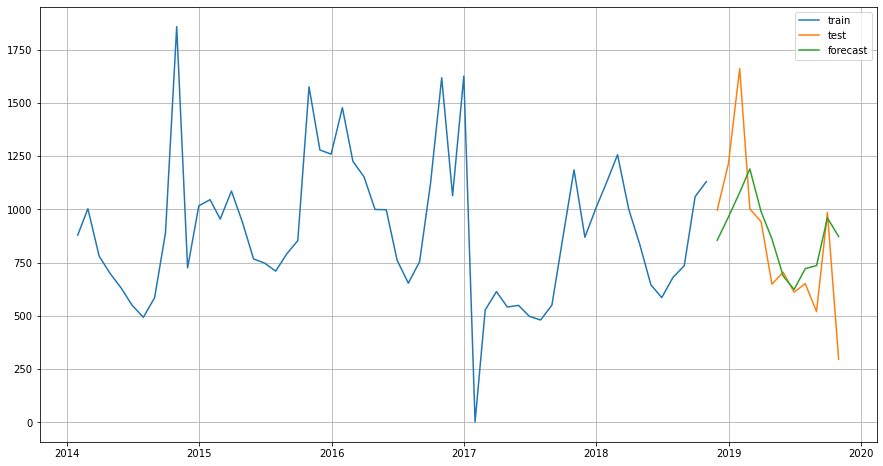

In [543]:
forecast = sarimax_results.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [544]:
print("MAE:",MAE(test['N02BE'],forecast))
print("MAPE:",MAPE(test['N02BE'],forecast))

MAE: 195.14985121791324
MAPE: 31.72994943921929
